In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train_df = pd.read_csv('/content/drive/MyDrive/MLBA/Project/train.csv',index_col=0)
test_df = pd.read_csv('/content/drive/MyDrive/MLBA/Project/test.csv',index_col=0)
full_df = pd.concat([train_df,test_df])

In [16]:
full_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


<Axes: title={'center': 'Passenger Satisfaction By Age'}, xlabel='Age (years)', ylabel='Number of Passengers'>

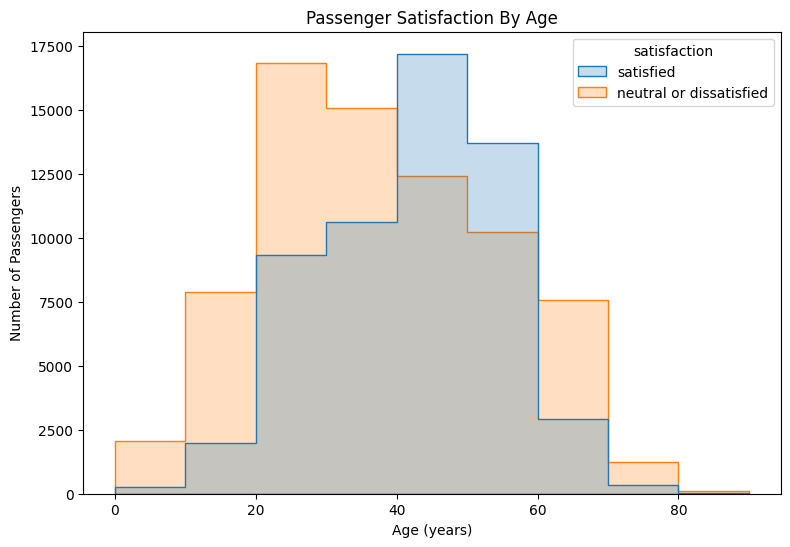

In [17]:
plt.figure(figsize=(9,6))
plt.title('Passenger Satisfaction By Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Passengers')
sns.histplot(data=full_df,x='Age',hue='satisfaction',bins=range(0,100,10),element='step',hue_order=['satisfied','neutral or dissatisfied'])

In [18]:
min(full_df['Flight Distance']),max(full_df['Flight Distance'])

(31, 4983)

<Axes: title={'center': 'Passenger Satisfaction By Flight Distance'}, xlabel='Flight Distance (mi)', ylabel='Number of Passengers'>

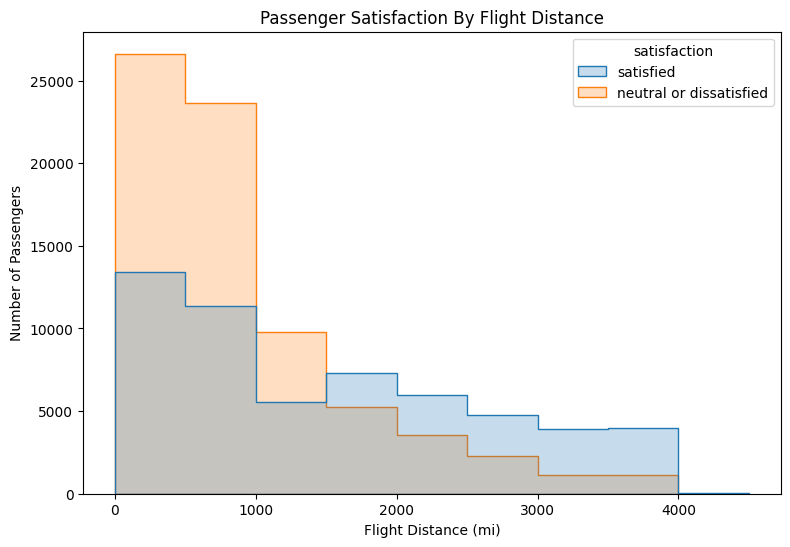

In [19]:
plt.figure(figsize=(9,6))
plt.title('Passenger Satisfaction By Flight Distance')
plt.xlabel('Flight Distance (mi)')
plt.ylabel('Number of Passengers')
sns.histplot(data=full_df,x='Flight Distance',hue='satisfaction',bins=range(0,5000,500),element='step',hue_order=['satisfied','neutral or dissatisfied'])

In [20]:
full_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [21]:
survey_cols = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    ]

for c in survey_cols:
  print(f'{c}: {full_df[c].value_counts()},')

Inflight wifi service: 2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: Inflight wifi service, dtype: int64,
Departure/Arrival time convenient: 4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure/Arrival time convenient, dtype: int64,
Ease of Online booking: 3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online booking, dtype: int64,
Gate location: 3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: Gate location, dtype: int64,
Food and drink: 4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: Food and drink, dtype: int64,
Online boarding: 4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: Online boarding, dtype: int64,
Seat comfort: 4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: Seat comfort, dtype: int64,
Inflight entertainment: 4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: Inflight enter

### Categorical Columns

Class, Customer Type, Gender, Type of Travel

In [22]:
clean_df = full_df.dropna(how='any')
num_cols = clean_df.select_dtypes(include=['float','int']).columns
cat_cols = clean_df.columns.difference(num_cols)
print(f'num_cols:{num_cols}\n cat_cols:{cat_cols}')

num_cols:Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
 cat_cols:Index(['Class', 'Customer Type', 'Gender', 'Type of Travel', 'satisfaction'], dtype='object')


In [ ]:
for c in cat_cols:
  if c =='satisfaction':
    continue
  dummies = pd.get_dummies(clean_df[c],drop_first=True,prefix=c)
  clean_df = clean_df.join(dummies)
clean_df.head()